In [1]:
%load_ext autoreload
%matplotlib inline

In [23]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm

import xarray as xr
import numpy as np
import pandas as pd
from pprint import pprint
import cartopy.crs as ccrs

List all DYAMOND variables

In [4]:
path_dy = '/bdd/DYAMOND/SAM-4km/'
path_dy_2D = os.path.join(path_dy,'OUT_2D')
path_dy_3D = os.path.join(path_dy,'OUT_3D')

In [5]:
varids = list(set([s.split('.')[-3] for s in glob.glob(os.path.join(path_dy_2D,'*'))]))
varids.sort()
print(varids)

['CWP', 'GWP', 'IWP', 'LANDMASK', 'LHF', 'LWDSA', 'LWNSA', 'LWNTA', 'OM500', 'OM700', 'OM850', 'PSFC', 'PW', 'Precac', 'Q2m', 'RH500', 'RH700', 'RH850', 'RWP', 'SHF', 'SWDSA', 'SWNSA', 'SWNTA', 'SWP', 'S_TS1', 'S_WS1', 'T2mm', 'TAUX', 'TAUY', 'U10m', 'V10m']


Load precipitation data

In [6]:
varid = 'Precac'
timestep = 279360

def getPath(varid,timestep,dataset='DYAMOND'):
    
    if dataset == 'DYAMOND':
        timestep_str = '{:010}'.format(timestep)
        rootpath_dy = '/bdd/DYAMOND/SAM-4km/OUT_2D/DYAMOND_9216x4608x74_7.5s_4km_4608'
        path = '%s_%s.%s.2D.nc'%(rootpath_dy,timestep_str,varid)
    
    return path

precac = xr.open_dataset(getPath(varid,timestep))


In [7]:
precac

<xarray.Dataset>
Dimensions:  (lat: 4608, lon: 9216, time: 1)
Coordinates:
  * lat      (lat) float32 -88.98 -88.94 -88.9 -88.86 ... 88.86 88.9 88.94 88.98
  * lon      (lon) float32 0.01953 0.05859 0.09766 0.1367 ... 359.9 359.9 360.0
  * time     (time) float32 238.2
Data variables:
    Precac   (time, lat, lon) float32 ...
Attributes:
    history:  Sat Jul 28 10:43:42 2018: ncks -v Precac /gpfs/p/unsb0007/SAM7....
    NCO:      netCDF Operators version 4.7.4 (http://nco.sf.net)

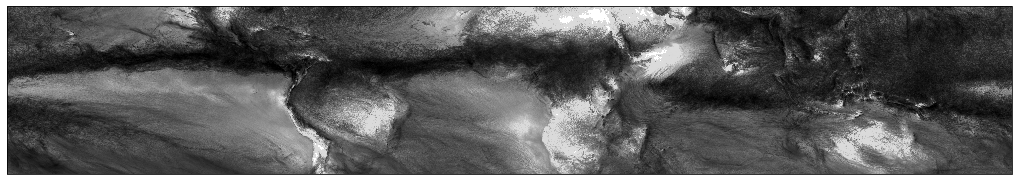

In [29]:
fig = plt.figure(figsize=(18,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))

cmap = plt.cm.binary

data = precac.Precac[0]
lon_lim = (0,360)
lat_lim = (-30,30)
slice_lat = slice(*lat_lim)
slice_lon = slice(*lon_lim)
clim = (1e-2,1e3)

# ax.imshow(precac.Precac[0])
lat_dyamond = data.lat.sel(lat=slice_lat).data
lon_dyamond = data.lon.sel(lon=slice_lon).data

lonarray_dyamond,latarray_dyamond = np.meshgrid(lon_dyamond,lat_dyamond)

# background
Z = data.sel(lon=slice_lon,lat=slice_lat)
# Z = Precac_DYAMOND.sel(lon=slice_lon,lat=slice_lat)[0]

im = ax.pcolormesh(lonarray_dyamond,latarray_dyamond,Z,transform=ccrs.PlateCarree(),
              alpha=0.9,cmap=cmap,norm=LogNorm(vmin=clim[0],vmax=clim[1]))
# im.set_clim(*clim)


# # geography
# ax.set_extent([lon_lim[0],lon_lim[1], *lat_lim],crs=ccrs.PlateCarree(central_longitude=0))
# ax.coastlines('110m')
# ax.gridlines()

# # colorbar
# x,y,w,h = ax.get_position().bounds
# dx = w/60
# cax = plt.axes([x+w+2*dx,y,dx,h])
# cbar = fig.colorbar(im, cax=cax, orientation='vertical')
# cbar.ax.set_ylabel('Precipitation (mm)')
